# **Initial Graphs - ACLR Final Project**
#### Group: Elaine, Rachel, Yuthi

**Graph 1:**

Planning on creating a scatterplot showing how both physical and mental readiness affect each other and the individual's overall confidence in returning to play.

In [1]:
# Environment Setup:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

In [2]:
# importing data as dataframe:
df = pd.read_csv('aclr data(in).csv')

# filtering df to be consistent with relevant variables of interest:
df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi', 'tegner_pre', 'tegner_now', 'lsi_ext_isok_60', 'lsi_flex_isok_60']]
# previewing df with relevant columns:
df.head()

,sex_dashboard,graft_dashboard2,reinjury,age,height_m,mass_kg,bmi,ikdc,acl_rsi,tegner_pre,tegner_now,lsi_ext_isok_60,lsi_flex_isok_60
0,Male,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,No,21.7,1.9,87.4,24.210526,95.4,87.5,9.0,9.0,87.86,103.32
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,HS autograft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,No,14.5,1.6,72.2,28.203125,79.3,8.3,8.0,5.0,45.00,72.98


In [3]:
# Filtering for numeric columns:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# imputing missing values with the mean for each respective column
mean_values = df[numeric_columns].mean()
m_df = df.fillna(mean_values)

# previewing the imputed dataframe:
print(m_df.head(5))

  sex_dashboard graft_dashboard2 reinjury        age  height_m    mass_kg  \
0          Male            Other      NaN  20.184761  1.725412  74.343033   
1           NaN              NaN       No  21.700000  1.900000  87.400000   
2           NaN              NaN      NaN  20.184761  1.725412  74.343033   
3        Female     HS autograft      NaN  20.184761  1.725412  74.343033   
4           NaN              NaN       No  14.500000  1.600000  72.200000   

         bmi       ikdc    acl_rsi  tegner_pre  tegner_now  lsi_ext_isok_60  \
0  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
1  24.210526  95.400000  87.500000    9.000000    9.000000        87.860000   
2  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
3  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
4  28.203125  79.300000   8.300000    8.000000    5.000000        45.000000   

   lsi_flex_isok_60  
0         89.728019  
1        103.32000

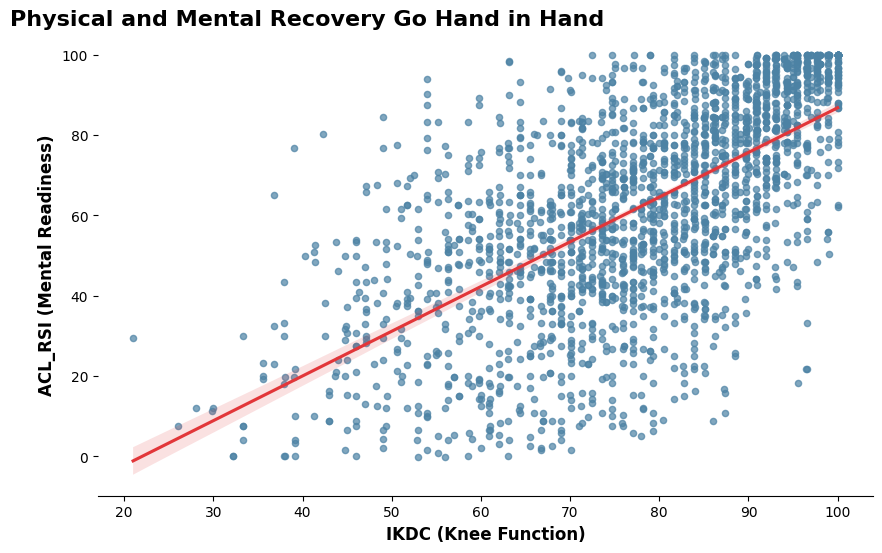

In [4]:
# data for graphing (getting rid of NaN values):
df_clean = df[['ikdc', 'acl_rsi']].dropna()

# creating scatterplot with a regression line: 
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='ikdc', y='acl_rsi', color='#4C82A4',
            scatter_kws={'s': 20, 'alpha': 0.7}, # reducing size of scatter plots to avoid overlap
           line_kws={'color': '#E23639'})

# == SCAFFOLDING == 

# setting title:
plt.title('Physical and Mental Recovery Go Hand in Hand', weight = 'bold', fontsize = 16, x = 0.27)
# setting x-axis and y-axis labels:
plt.xlabel('IKDC (Knee Function)', weight = 'bold', fontsize = 12)
plt.ylabel('ACL_RSI (Mental Readiness)', weight = 'bold', fontsize = 12)

# extra formatting (removing spines for cleaner look):
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


plt.show()

**Graph 2:**

Planning on creating a scatterplot showing how both physical and mental readiness affect each other and the individual's overall confidence in returning to play.

   graft_dashboard2 reinjury
0             Other       No
3      HS autograft       No
8      HS autograft      NaN
10     HS autograft       No
15     HS autograft       No


/var/folders/4c/yrvzpq_57zv34g485zg023780000gn/T/ipykernel_98730/1183072511.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_graft = counts.groupby('graft_dashboard2')['count'].transform('sum') #get sums


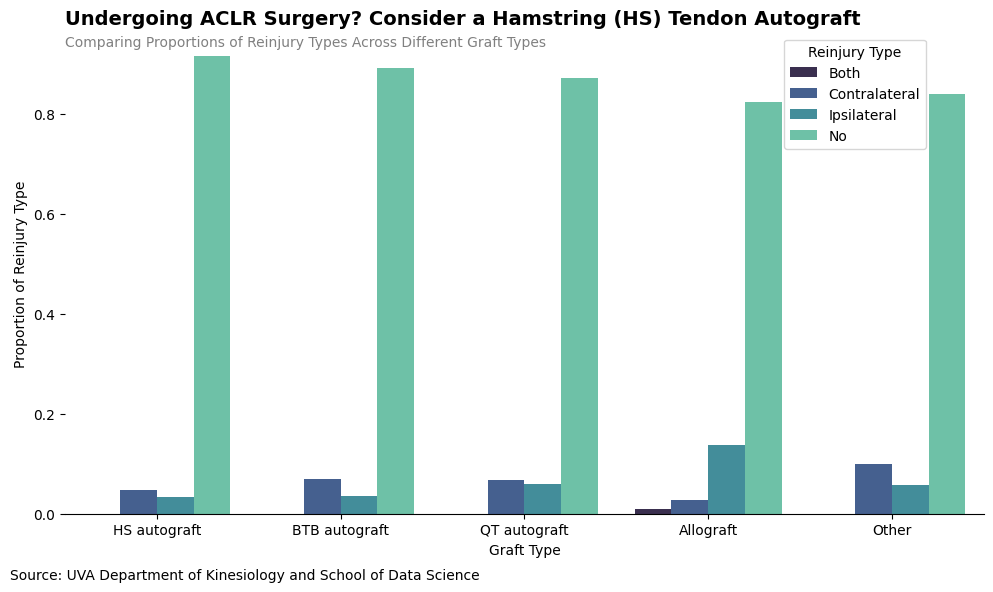

In [5]:
df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi']]

df = df[df['reinjury'].str.upper() != 'BLANK'] #get rid of all blank in reinjury
df['reinjury_shifted'] = df['reinjury'].shift(-1) #align reinjury with other values
df_cleaned = df[df['graft_dashboard2'].notna()][['graft_dashboard2', 'reinjury_shifted']] #get rid of na
df_cleaned.columns = ['graft_dashboard2', 'reinjury'] #rename
print(df_cleaned.head())

counts = ( #get counts of graft and reinjury
    df_cleaned.groupby(['graft_dashboard2', 'reinjury'])
    .size()
    .reset_index(name='count')
)

graft_order = ['HS autograft', 'BTB autograft', 'QT autograft', 'Allograft', 'Other'] #order
counts['graft_dashboard2'] = pd.Categorical( #set order in counts
    counts['graft_dashboard2'],
    categories=graft_order,
    ordered=True
)
total_per_graft = counts.groupby('graft_dashboard2')['count'].transform('sum') #get sums
counts['proportion'] = counts['count'] / total_per_graft #calculate proportions

plt.figure(figsize=(10, 6))
sns.barplot( #make grouped barplot
    data=counts,
    x='graft_dashboard2',
    y='proportion',
    hue='reinjury',
    palette='mako'
)
plt.xlabel('Graft Type')
plt.ylabel('Proportion of Reinjury Type')
plt.title('Undergoing ACLR Surgery? Consider a Hamstring (HS) Tendon Autograft', fontsize=14, weight='bold', loc='left')  # Main title
plt.text(0, 0.98, 'Comparing Proportions of Reinjury Types Across Different Graft Types', 
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10, color='gray')  # Subtitle
plt.legend(title='Reinjury Type', loc='upper left', bbox_to_anchor=(0.775, 1.0))
plt.text(-0.8, -0.13, 'Source: UVA Department of Kinesiology and School of Data Science', ha='left', fontsize=10)

sns.despine(top=True, right=True, left=True) #get rid of axes
plt.tight_layout()
plt.show()

**Graph 3**: Looking at the relationship between different reinjuries between the sexes.

In [6]:
import plotly.express as px
import plotly.graph_objects as go

# shift row values by 1  - (for every graft_type recorded, reinjury was blank so shifted by 1 to match)
m_df['reinjury_shifted'] = m_df['reinjury'].shift(-1)
df2 = m_df[m_df['sex_dashboard'].notna()][['sex_dashboard', 'reinjury_shifted']]
df2.columns = ['sex_dashboard', 'reinjury']
print(df2.head()) # previewing cleaned dataset

df2 = df2[
    (df2['reinjury'].str.upper() != 'BLANK') &
    (df2['sex_dashboard'].str.upper() != 'BLANK')]

df2 = df2[df2['reinjury'].str.upper() != 'NO'] # dropping 'no' reinjury records


grouped_counts2 = (
    df2.groupby(['sex_dashboard', 'reinjury'])
    .size()
    .reset_index(name='count')
)


fig = px.bar(
    grouped_counts2,
    x='count',
    y='sex_dashboard',
    facet_col='reinjury',
    orientation='h',
    color='reinjury',
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={
        'count': 'Count',
        'sex_dashboard': 'Sex',
        'reinjury': 'Reinjury Type'
    },
    title='Sex Breakdown by Reinjury Type'
)

# appearance of bars and text labels
fig.update_traces(
    textposition='outside',  # text labels outside the bars
)

fig.update_layout(
    showlegend=False,
    title=dict(x=0.05),
    height=400
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean facet titles

fig.show()

   sex_dashboard reinjury
0           Male       No
3         Female       No
8         Female    BLANK
10        Female       No
15        Female       No
